In [1]:
!pip install torch

In [2]:
!pip install torchvision

In [3]:
!pip install matplotlib

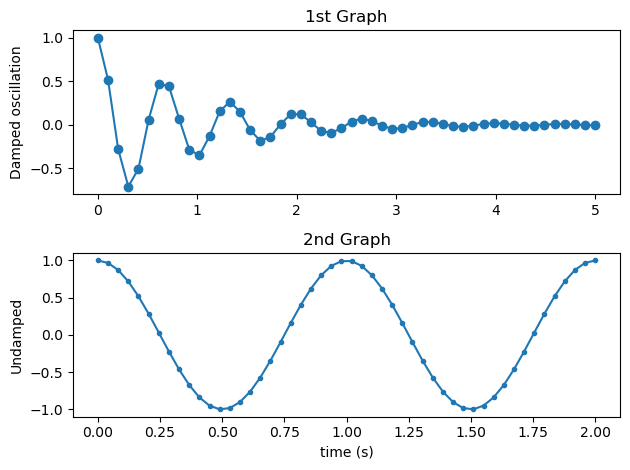

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(3 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

plt.subplot(2, 1, 1)                # nrows=2, ncols=1, index=1
plt.plot(x1, y1, 'o-')
plt.title('1st Graph')
plt.ylabel('Damped oscillation')

plt.subplot(2, 1, 2)                # nrows=2, ncols=1, index=2
plt.plot(x2, y2, '.-')
plt.title('2nd Graph')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.tight_layout()
##plt.show()
#plt.savefig('savefig_default.png')



Files already downloaded and verified


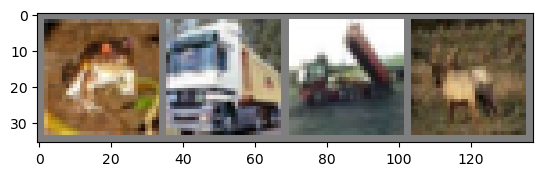

GroundTruth:   frog truck truck  deer
Predicted:    cat   cat   cat   cat


In [3]:
import os
import sys
cwd = os.getcwd()
#add CIFAR10 data in the environment
sys.path.append(cwd + '/../cifar10')

#Numpy is linear algebra lbrary
import numpy as np
# Matplotlib is a visualizations library
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import utils
from torchvision import transforms
#CIFAR10 is a custom Dataloader that loads a subset ofthe data from a local folder
import keras
#from Cifar10Dataloader import CIFAR10

batch_size=4

def load_data():

    #convert the images to tensor and normalized them
    transform = transforms.Compose([
         transforms.ToTensor(),
         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
        ])

    trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                              shuffle=False, num_workers=1)
    return trainloader


def show_image(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

classes = ('plane', 'car', 'bird', 'cat',
       'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.conv1 = nn.Conv2d(3,6,5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16*5*5,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)

    def forward(self,x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1,16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

def train(model, training_data):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(),lr=0.001,momentum=0.9)
    running_loss = 0.0
    for epoch in range(3):  # loop over the dataset multiple times

        for i, data in enumerate(training_data, 0):
            # get the inputs; cifar10 is a list of [inputs, labels]
            inputs,labels=data
            # zero the parameter gradients
            optimizer.zero_grad()
            # forward + backward + optimize
            outputs = model(inputs)
            # print statistics
            loss = criterion(outputs,labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            if i % 2000 == 1999:  # print every 2000 mini-batches
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 2000))
                running_loss = 0.0
    print('Finished Training')



def evaluate(model):
    dataiter = iter(load_data())
    images, labels = next(dataiter)
    # print images
    show_image(utils.make_grid(images))
    print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

    outputs = model(images)

    _, predicted = torch.max(outputs, 1)

    print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))



def main():

    training_data = load_data()

    model = CNN()

    train(model, training_data)

    evaluate(model)

main()

